In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
repo_dir = os.path.join(os.path.abspath('../../'))
repo_dir

'/mnt/c/Users/nicol/Documents/GitHub/wsl_experimental_pridict2/experimental_pridict2'

In [4]:
import sys
sys.path.insert(0,repo_dir)
import pridict

In [5]:
data_pth = os.path.join(repo_dir, 'dataset')
data_pth

'/mnt/c/Users/nicol/Documents/GitHub/wsl_experimental_pridict2/experimental_pridict2/dataset'

In [6]:
df = pd.read_csv(os.path.join(data_pth, 'proc_v2', f'data_23k_v1.csv'))

In [7]:
df.columns.tolist()

['Correction_Type',
 'Correction_Length',
 'Correction_Deletion',
 'Correction_Insertion',
 'Correction_Replacement',
 'RToverhangmatches',
 'RToverhanglength',
 'RTlength',
 'PBSlength',
 'RTmt',
 'RToverhangmt',
 'PBSmt',
 'protospacermt',
 'extensionmt',
 'original_base_mt',
 'edited_base_mt',
 'original_base_mt_nan',
 'edited_base_mt_nan',
 'deepeditposition',
 'deepeditposition_lst',
 'protospacerlocation_only_initial',
 'PBSlocation',
 'RT_initial_location',
 'RT_mutated_location',
 'Editing_Position',
 'wide_initial_target',
 'wide_mutated_target',
 'seq_id',
 'grp_id',
 'HEKaverageedited_clamped',
 'HEKaverageunedited_clamped',
 'HEKaverageunintended_clamped',
 'K562averageedited_clamped',
 'K562averageunedited_clamped',
 'K562averageunintended_clamped']

In [8]:
from pridict.pridictv2.dataset import MinMaxNormalizer
from pridict.pridictv2.data_preprocess import *
from pridict.pridictv2.utilities import *

/home/nimath/miniconda3/envs/pridict2/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [9]:
def get_outcome_colnames(prefix, suffix=None):
    if suffix:
        lst = [f'{prefix}{colname}_{suffix}' for colname in ['averageedited', 'averageunedited', 'averageunintended']]
    else:
        lst = [f'{prefix}{colname}' for colname in ['averageedited', 'averageunedited', 'averageunintended']]
    return lst

### Process the dataset df

In [10]:
pe_seq_processor = PESeqProcessor()
tdf, proc_seq_init_df, num_init_cols,  proc_seq_mut_df, num_mut_cols = pe_seq_processor.process_init_mut_seqs(df, 
                                                                                                              'wide_initial_target', 
                                                                                                              'wide_mutated_target', 
                                                                                                              align_symbol=2)

creating annotation matrices: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]
9it [00:06,  1.35it/s]00:00<?, ?it/s]
9it [00:05,  1.51it/s]00:06<00:20,  6.67s/it]
10it [00:12,  1.27s/it]                      


In [11]:
check_editing_alignment_correctness(tdf, correction_len_colname='Correction_Length_effective')

100%|██████████| 22956/22956 [00:15<00:00, 1503.66it/s]


[]

### Merge the new data frame with original one

In [12]:
# add to df
df = pd.merge(left = df,
              right = tdf[['seq_id', 'wide_initial_target_align', 'wide_mutated_target_align', 
                           'Correction_Length_effective']],
             how='inner',
             left_on=['seq_id'],
             right_on=['seq_id'])

df['PBSinitlength'] = proc_seq_init_df['end_PBS'] - proc_seq_init_df['start_PBS']
df['PBSmutlength'] = proc_seq_mut_df['end_PBS'] - proc_seq_mut_df['start_PBS']
print((df['PBSinitlength'] == df['PBSmutlength']).all())
df['PBSlength'] = df['PBSinitlength']


True


### Visualize sequences

In [13]:
from IPython.core.display import HTML

#### using precomputed aligned dataframe

In [14]:
for correction_type in ['Replacement', 'Insertion', 'Deletion']:
    cond = (df['Correction_Type'] == correction_type) & (df['Correction_Length']>7)
    seq_id = np.random.choice(df.loc[cond, 'seq_id'])
    display(HTML(Viz_PESeqs().viz_align_initmut_seq_precomputed(tdf, seq_id, wsize=20, return_type='html')))

max_num_cols: 99
annot_dict: {'Protos': (10, 29), 'PBS': (13, 26), 'RT_init': (26, 50), 'RT_mut': (26, 50)}
end_annot_seq: 50
st_annot_seq: 10
st_seq: 0
end_seq: 70
ewindow_st: 32
ewindow_end: 70
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Seq. ID:seq_23923,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
Protos,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PBS,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RT_init,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,
Initial sequence,A,G,C,C,T,A,C,C,A,A,C,A,G,C,C,A,C,T,G,C,T,C,A,T,G,A,T,G,G,A,G,G,T,C,A,T,C,A,A,G,A,A,A,A,A,G,A,T,G,C,A,G,A,T,G,C,T,G,A,A,G,T,T,A,G,A,C,A,A,G
Mutated sequence,A,G,C,C,T,A,C,C,A,A,C,A,G,C,C,A,C,T,G,C,T,C,A,T,G,A,T,G,G,A,G,G,C,C,A,T,C,A,A,A,A,A,A,A,A,G,A,T,G,C,A,G,A,T,G,C,T,G,A,A,G,T,T,A,G,A,C,A,A,G
Editing: Replacement,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,*,,,,,,,*,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PBS,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RT_mut,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,


max_num_cols: 113
annot_dict: {'Protos': (10, 29), 'PBS': (13, 26), 'RT_init': (26, 56), 'RT_mut': (26, 56)}
end_annot_seq: 56
st_annot_seq: 10
st_seq: 0
end_seq: 76
ewindow_st: 35
ewindow_end: 76
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Seq. ID:seq_11545,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
Protos,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PBS,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RT_init,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,
Initial sequence,A,T,G,G,C,T,T,C,T,C,T,G,C,T,C,T,G,G,C,C,T,C,T,C,C,T,T,C,C,T,G,G,A,A,T,-,-,-,-,-,-,-,-,-,-,-,-,-,-,T,G,T,T,T,C,T,C,G,C,A,G,G,G,C,T,G,G,C,G,C,T,C,A,G,G,G
Mutated sequence,A,T,G,G,C,T,T,C,T,C,T,G,C,T,C,T,G,G,C,C,T,C,T,C,C,T,T,C,C,T,G,G,A,A,T,T,C,G,G,T,G,C,A,A,T,C,G,A,A,T,G,T,T,T,C,T,C,G,C,A,G,G,G,C,T,G,G,C,G,C,T,C,A,G,G,G
Editing: Insertion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,*,*,*,*,*,*,*,*,*,*,*,*,*,*,,,,,,,,,,,,,,,,,,,,,,,,,,,
PBS,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RT_mut,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,


max_num_cols: 112
annot_dict: {'Protos': (10, 29), 'PBS': (13, 26), 'RT_init': (26, 58), 'RT_mut': (26, 58)}
end_annot_seq: 58
st_annot_seq: 10
st_seq: 0
end_seq: 78
ewindow_st: 38
ewindow_end: 78
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


Seq. ID:seq_17377,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
Protos,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PBS,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RT_init,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,
Editing: Deletion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,*,*,*,*,*,*,*,*,*,*,*,*,*,,,,,,,,,,,,,,,,,,,,,,,,,,,
Initial sequence,A,T,A,G,A,G,A,T,A,G,G,A,A,A,C,T,C,T,T,T,T,A,C,A,T,A,A,A,C,A,G,G,A,T,A,A,A,G,T,C,C,T,A,C,C,A,G,A,T,C,A,G,G,A,T,A,T,T,T,T,C,A,C,A,T,G,T,G,G,A,T,G,T,T,T,A,T,G
Mutated sequence,A,T,A,G,A,G,A,T,A,G,G,A,A,A,C,T,C,T,T,T,T,A,C,A,T,A,A,A,C,A,G,G,A,T,A,A,A,G,-,-,-,-,-,-,-,-,-,-,-,-,-,G,G,A,T,A,T,T,T,T,C,A,C,A,T,G,T,G,G,A,T,G,T,T,T,A,T,G
PBS,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RT_mut,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,


#### using original dataframe

In [15]:
display(HTML(Viz_PESeqs().viz_align_initmut_seq(df, seq_id, wsize=20, return_type='html')))

creating annotation matrices: 100%|██████████| 4/4 [00:00<00:00, 50.91it/s]

max_num_cols: 112
annot_dict: {'Protos': (10, 29), 'PBS': (13, 26), 'RT_init': (26, 58), 'RT_mut': (26, 58)}
end_annot_seq: 58
st_annot_seq: 10
st_seq: 0
end_seq: 78
ewindow_st: 38
ewindow_end: 78
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


Seq. ID:seq_17377,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
Protos,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PBS,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RT_init,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,
Editing: Deletion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,*,*,*,*,*,*,*,*,*,*,*,*,*,,,,,,,,,,,,,,,,,,,,,,,,,,,
Initial sequence,A,T,A,G,A,G,A,T,A,G,G,A,A,A,C,T,C,T,T,T,T,A,C,A,T,A,A,A,C,A,G,G,A,T,A,A,A,G,T,C,C,T,A,C,C,A,G,A,T,C,A,G,G,A,T,A,T,T,T,T,C,A,C,A,T,G,T,G,G,A,T,G,T,T,T,A,T,G
Mutated sequence,A,T,A,G,A,G,A,T,A,G,G,A,A,A,C,T,C,T,T,T,T,A,C,A,T,A,A,A,C,A,G,G,A,T,A,A,A,G,-,-,-,-,-,-,-,-,-,-,-,-,-,G,G,A,T,A,T,T,T,T,C,A,C,A,T,G,T,G,G,A,T,G,T,T,T,A,T,G
PBS,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RT_mut,,,,,,,,,,,,,,,,,,,,,,,,,,,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,,,,,,,,,,,,,,,,,,,,


### Normalize the continuous features

In [16]:
include_MFE = False
include_addendumfeat = False
minmax_normalizer = MinMaxNormalizer(include_MFE=include_MFE,include_addendumfeat=include_addendumfeat)
norm_colnames = minmax_normalizer.normalize_cont_cols_max(df, suffix='_norm')

array([[<Axes: title={'center': 'PBSlength'}>,
        <Axes: title={'center': 'PBSlength_norm'}>]], dtype=object)

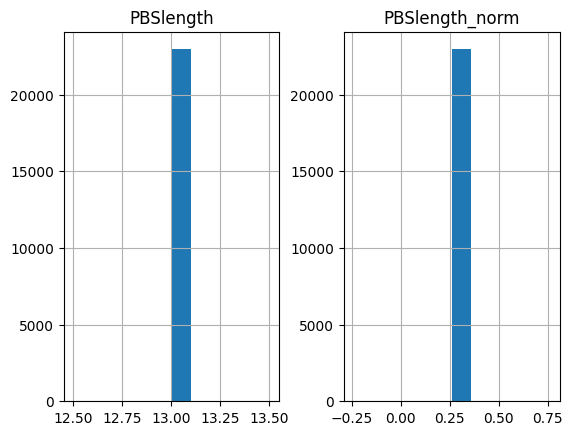

In [17]:
df[['PBSlength', 'PBSlength_norm']].hist()

array([[<Axes: title={'center': 'RToverhanglength'}>,
        <Axes: title={'center': 'RToverhanglength_norm'}>]], dtype=object)

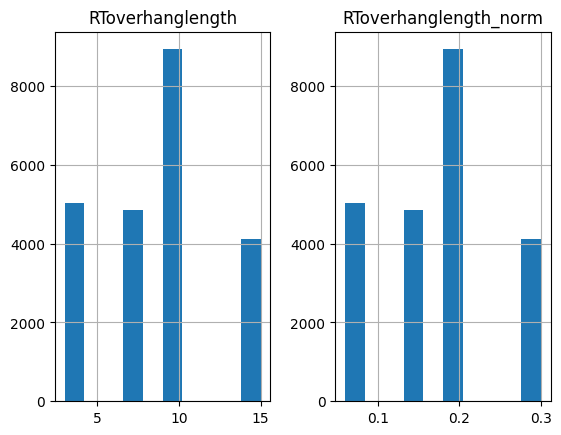

In [18]:
df[['RToverhanglength', 'RToverhanglength_norm']].hist()

array([[<Axes: title={'center': 'Correction_Length'}>,
        <Axes: title={'center': 'Correction_Length_norm'}>]], dtype=object)

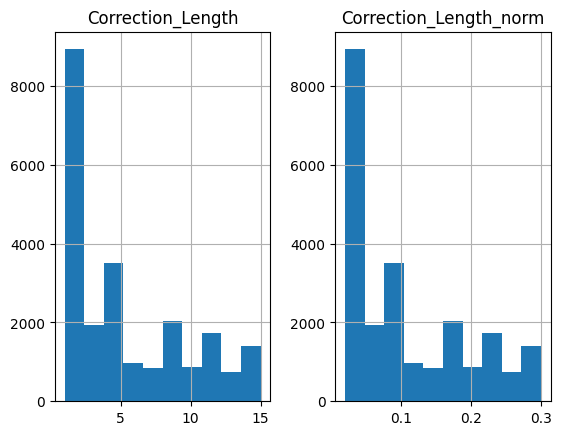

In [19]:
df[['Correction_Length', 'Correction_Length_norm']].hist()

array([[<Axes: title={'center': 'Correction_Length_effective'}>,
        <Axes: title={'center': 'Correction_Length_effective_norm'}>]],
      dtype=object)

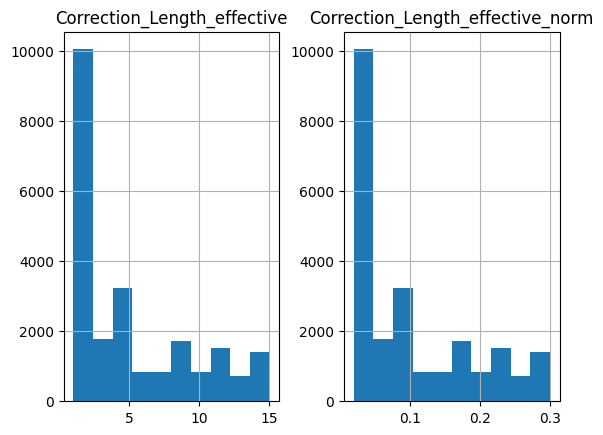

In [20]:
df[['Correction_Length_effective', 'Correction_Length_effective_norm']].hist()

### Create datapartitions, datatensor and dump on disk

In [21]:
from pridict.pridictv2.dataset import *

In [22]:
def run_clean_check_tests(df, dpartitions, outcome_name, suffix=''):
    print('run test to check NaN rows are removed for outcome:', outcome_name)
    print('>> True would mean that rows are still there!! <<')
    for run in range(len(dpartitions)):
        print('run:', run)
        for dsettype in ['train', 'validation', 'test']:
            indices = dpartitions[run][dsettype]
            if suffix:
                ocols = get_outcome_colnames(outcome_name, suffix)
            else:
                ocols = get_outcome_colnames(outcome_name)
            print(df.loc[indices, ocols].isna().any())
        print()
    print('run test for confirming there is no overlap between train, validation and test sets')
    print('>> 0 means no overlap <<')
    for run in range(5):
        print('run:', run)
        print(df.loc[dpartitions[run]['test'], 'grp_id'].isin(df.loc[dpartitions[run]['train'], 'grp_id']).sum())
        print(df.loc[dpartitions[run]['test'], 'grp_id'].isin(df.loc[dpartitions[run]['validation'], 'grp_id']).sum())
        print(df.loc[dpartitions[run]['validation'], 'grp_id'].isin(df.loc[dpartitions[run]['train'], 'grp_id']).sum())
        
def clean_dpartitions(dpartitions, nan_indices):
    dpartitions_upd = {}
    for run in range(len(dpartitions)):
        print('run_id:', run)
        dpartitions_upd[run] = {}
        for dsettype in ['train', 'validation', 'test']:
            indices = dpartitions[run][dsettype]
            print(f'# of {dsettype} indices:', len(indices))
            clean_indices = set(indices) - set(nan_indices)
            print(f'# of {dsettype} indices after:', len(clean_indices))
            dpartitions_upd[run][dsettype] = np.array(list(clean_indices))
        print()
    return dpartitions_upd

def plot_y_distrib_acrossfolds(dpartitions, y, opt='separate_folds'):
    #  histtype in {'bar', 'step'}, fill=True, stacked=True
    if opt == 'separate_dsettypes':
        fig, axs = plt.subplots(figsize=(9,11), 
                                nrows=3, 
                                constrained_layout=True)
        axs = axs.ravel()
        for run_num in range(len(dpartitions)):
            counter = 0
            for dsettype in ['train', 'validation', 'test']:
                curr_ax = axs[counter]
                ids = dpartitions[run_num][dsettype]
                curr_ax.hist(y[ids], alpha=0.3, label=f"{dsettype}_run{run_num}")
                counter+=1
                curr_ax.legend()
    elif opt == 'separate_folds':
        fig, axs = plt.subplots(figsize=(9,11),
                                nrows=5,
                                constrained_layout=True)
        axs = axs.ravel()
        for run_num in range(len(dpartitions)):
            curr_ax = axs[run_num]
            for dsettype in ['train', 'validation', 'test']:
                ids = dpartitions[run_num][dsettype]
                curr_ax.hist(y[ids], alpha=0.4,label=f"{dsettype}_run{run_num}")
                curr_ax.legend()


### Run to create cleaned datapartitions and dtensor

fold_num: 0
train data
n= 16508
validation data
n= 1856
test data
n= 4592

-------------------------
fold_num: 1
train data
n= 16544
validation data
n= 1821
test data
n= 4591

-------------------------
fold_num: 2
train data
n= 16524
validation data
n= 1841
test data
n= 4591

-------------------------
fold_num: 3
train data
n= 16509
validation data
n= 1856
test data
n= 4591

-------------------------
fold_num: 4
train data
n= 16530
validation data
n= 1835
test data
n= 4591

-------------------------
total number of ids: 22956
fold_num 0
fold_num 1
fold_num 2
fold_num 3
fold_num 4
total accum train ids: 22949
total accum val ids: 7727
total accum test ids: 22956
union of all accum:  22956
passed intersection and overlap test (i.e. train, validation and test sets are not intersecting in each fold)

--- create_datatensor ---
--- aligned initial and mutated sequences ---

run_id: 0
# of train indices: 16508
# of train indices after: 16246
# of validation indices: 1856
# of validation indic

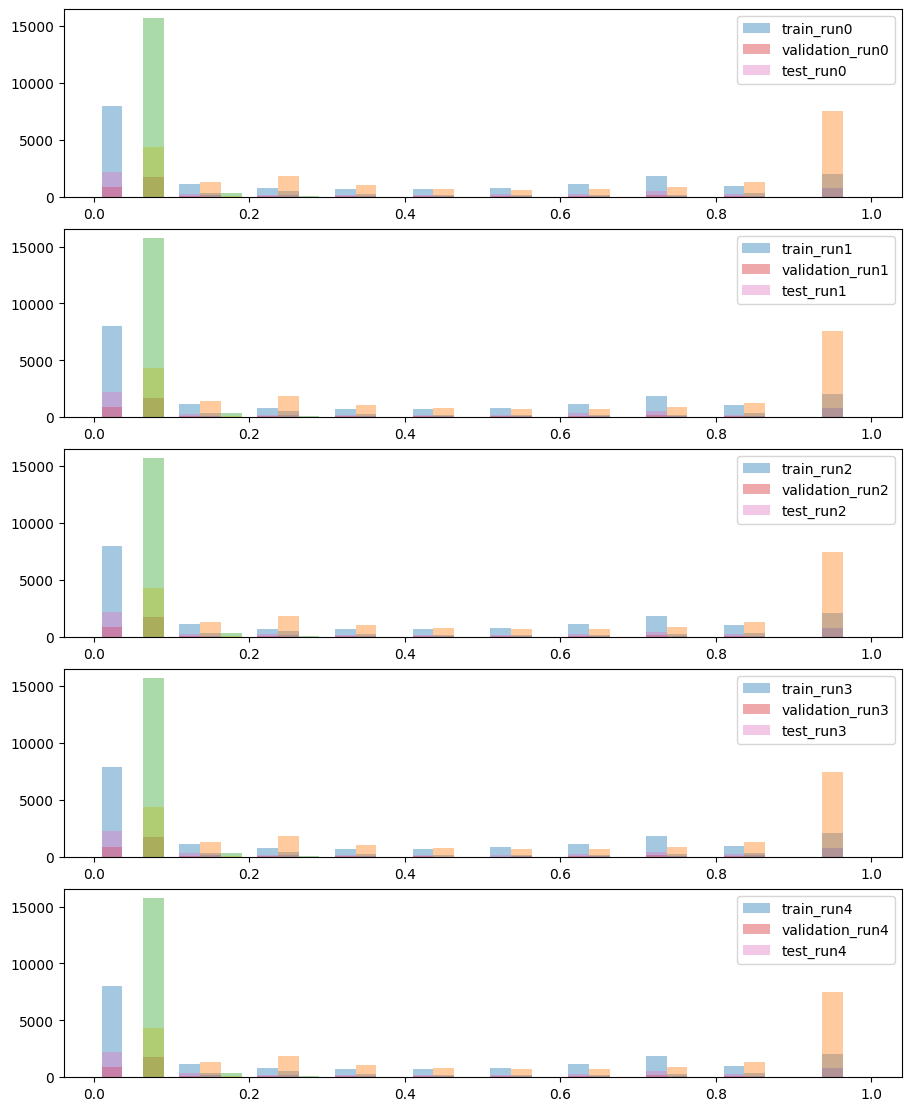

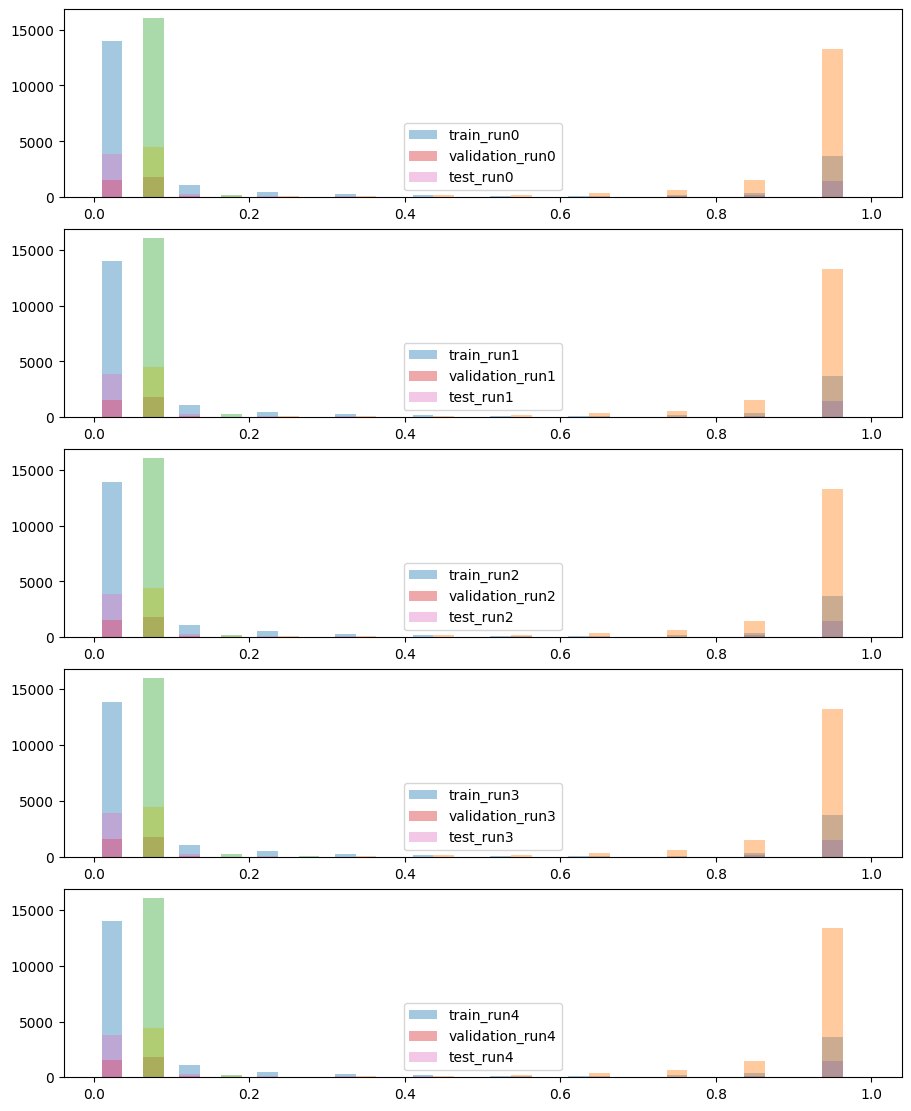

In [23]:
tfolder = 'proc_v2'
tdir = create_directory(os.path.join(repo_dir, 'dataset', tfolder))
if include_MFE:
    fsuffix = 'withMFE'
else:
    fsuffix = 'withoutMFE'
dump_dir = create_directory(os.path.join(repo_dir, 'dataset', tfolder, f'align_{fsuffix}'))
hek_indices_nan = ReaderWriter.read_data(os.path.join(tdir, f'hek_indices_nan.pkl'))
k562_indices_nan = ReaderWriter.read_data(os.path.join(tdir, f'k562_indices_nan.pkl'))

wsize=20
outcome_suffix = 'clamped'

# get grouped 5-fold data partitions
dpartitions = get_stratified_partitions(df['grp_id'].values, num_folds=5, valid_set_portion=0.1, random_state=42)
validate_partitions(dpartitions, range(df['grp_id'].shape[0]), valid_set_portion=0.1, test_set_portion=0.2)
print()
for outcome_name in ['HEK', 'K562']:
    dtensor = create_datatensor(df, proc_seq_init_df, num_init_cols, 
                                proc_seq_mut_df, num_mut_cols, norm_colnames, 
                                window=wsize, y_ref=get_outcome_colnames(outcome_name, outcome_suffix))
    if outcome_name == 'HEK':
        nan_indices = hek_indices_nan
    elif outcome_name == 'K562':
        nan_indices = k562_indices_nan
    
#     run_clean_check_tests(df, dpartitions, outcome_name, suffix=outcome_suffix)
    print()
    dpartitions_upd = clean_dpartitions(dpartitions, nan_indices)
    run_clean_check_tests(df, dpartitions_upd, outcome_name, suffix=outcome_suffix)
    print()
    plot_y_distrib_acrossfolds(dpartitions_upd, dtensor.y_score.numpy(), opt='separate_folds')
    
    # dump on disk
    fname = f'dpartitions_{outcome_name}_{outcome_suffix}_wsize{wsize}.pkl'
    ReaderWriter.dump_data(dpartitions_upd, os.path.join(dump_dir, fname))
    fname = f'dtensor_{outcome_name}_{outcome_suffix}_wsize{wsize}.pkl'
    ReaderWriter.dump_data(dtensor, os.path.join(dump_dir, fname))
